# Assignment 1 (Coding Part)

- Implement the required code for each problem in the allocated area.
- Write down your comments clearly.
- Please submit your notebook with outputs displayed.

## Exercise 1.10

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def flip_coin():
    '''
    This function simulates a coin flip. It returns 'H' for heads and 'T' for tails.
    '''
    return random.choice(['H', 'T'])

### Exercise 1.10 (a)

In [5]:
'''
c1: First coin flipped
crand: A coin you choose at random
cmin: The coin with the minimum frequency of heads
'''
# Probability of heads for the first coin flipped (c1)
mu_c1 = 0.5

# Probability of heads for a coin chosen at random (crand)
mu_crand = 0.5

# Probability of heads for the coin with the minimum frequency of heads (cmin)
mu_cmin = 0.5

print('mu_c1:', mu_c1)
print('mu_crand:', mu_crand)
print('mu_cmin:', mu_cmin)

# Since all coins are fair, the expected value of the number of heads is 50%

mu_c1: 0.5
mu_crand: 0.5
mu_cmin: 0.5


### Exercise 1.10 (b)

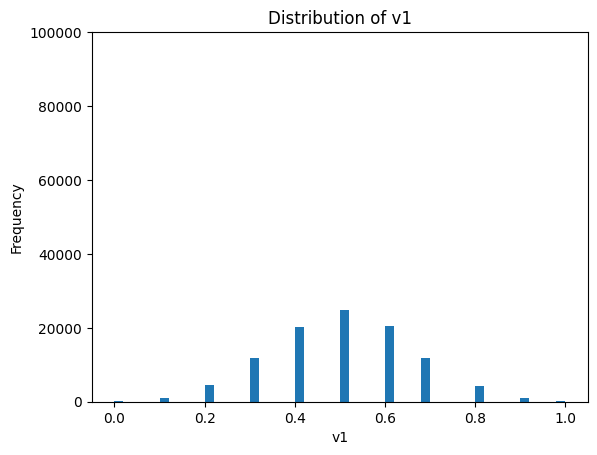

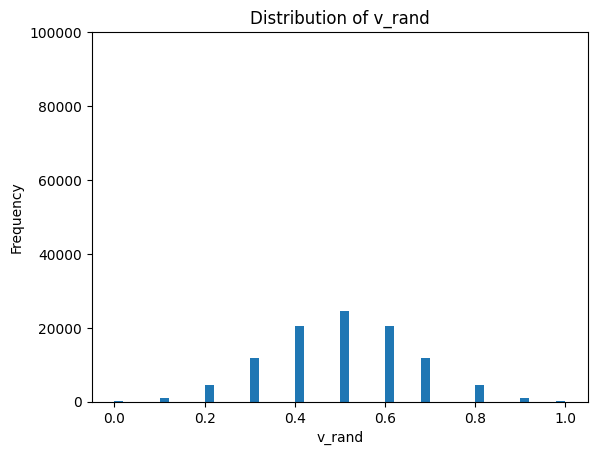

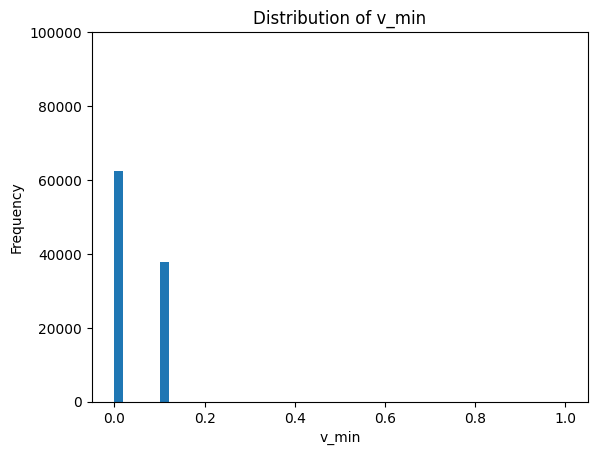

In [4]:
# Number of coins
num_coins = 1000

# Number of flips per coin
num_flips = 10

# Number of experiments
num_experiments = 100000

# Arrays to store results for each experiment
v1 = np.zeros(num_experiments)
v_rand = np.zeros(num_experiments)
v_min = np.zeros(num_experiments)

# Perform experiments
for i in range(num_experiments):
    # Initialize list to store results of each coin flip
    coins = [0] * num_coins
    
    # Flip each coin num_flips times and calculate the fraction of heads
    for j in range(num_coins):
        for k in range(num_flips):
            coins[j] += flip_coin() == 'H'  # 'H' represents heads
        coins[j] /= num_flips  # Convert the count of heads to a fraction
    
    # Store the results of each strategy for this experiment
    v1[i] = coins[0]  # First coin
    v_rand[i] = coins[random.randint(0, num_coins - 1)]  # Random coin
    v_min[i] = min(coins)  # Coin with minimum fraction of heads

# Function to plot histogram
def plot_histogram(v, title, x_label, y_label):
    plt.hist(v, bins=50, range=(0, 1))  # Plot histogram with 50 bins from 0 to 1
    plt.ylim(0, num_experiments)  # Set y-axis limits
    plt.title(title)  # Set title
    plt.xlabel(x_label)  # Set x-axis label
    plt.ylabel(y_label)  # Set y-axis label
    plt.show()  # Show the plot

# Plot histograms for each strategy
plot_histogram(v1, 'Distribution of v1', 'v1', 'Frequency')
plot_histogram(v_rand, 'Distribution of v_rand', 'v_rand', 'Frequency')
plot_histogram(v_min, 'Distribution of v_min', 'v_min', 'Frequency')

### Exercise 1.10 (c)

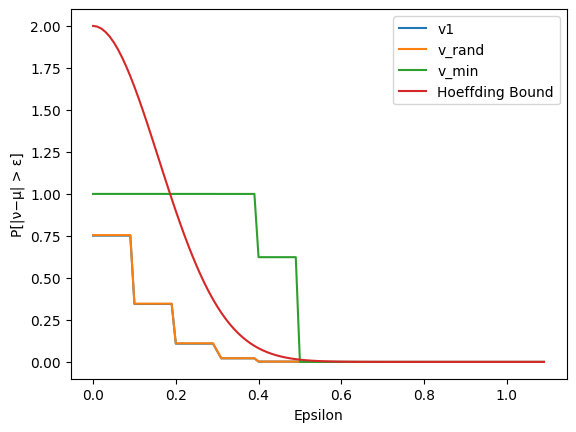

In [6]:
'''
Using (b), plot estimates of P[|ν−μ| > ε] as a function of ε, together with the
Hoeffding bound (on the same graph).
'''
def calc_err(v, mu, epsilon):
    '''
    This function calculates the probability that the absolute difference between the fraction of heads and the true probability of heads is greater than epsilon.
    '''
    return np.mean(np.abs(v - mu) > epsilon)

def calc_bound(epsilon, N):
    '''
    This function calculates the Hoeffding bound for the given epsilon and number of flips. The bound is calculated as 2 * exp(-2 * epsilon^2 * N).
    '''
    return 2 * np.exp(-2 * epsilon**2 * N)

# Define values for epsilon
epsilons = np.arange(0, 1.1, 0.01)

# Arrays to store errors and Hoeffding bounds for different epsilons
c1_err = np.zeros(len(epsilons))
crand_err = np.zeros(len(epsilons))
cmin_err = np.zeros(len(epsilons))
hoeffding_bounds = np.zeros(len(epsilons))

# Calculate errors and Hoeffding bounds for different epsilons using the functions defined above
for i in range(len(epsilons)):
    c1_err[i] = calc_err(v1, mu_c1, epsilons[i])
    crand_err[i] = calc_err(v_rand, mu_crand, epsilons[i])
    cmin_err[i] = calc_err(v_min, mu_cmin, epsilons[i])
    hoeffding_bounds[i] = calc_bound(epsilons[i], num_flips)

# Plot the results
plt.plot(epsilons, c1_err, label='v1')
plt.plot(epsilons, crand_err, label='v_rand')
plt.plot(epsilons, cmin_err, label='v_min')
plt.plot(epsilons, hoeffding_bounds, label='Hoeffding Bound')
plt.xlabel('Epsilon')
plt.ylabel('P[|ν−μ| > ε]')
plt.legend()
plt.show()

### Exercise 1.10 (d)

In [ ]:
'''
Q: Which coins obey the Hoeffding bound, which ones do not? Explain why.

A: The v1 and v_rand coins obey the Hoeffding bound, while the v_min coin does not. The Hoeffding bound is based on the probability of the observed frequency of heads differing from the true frequency of heads by more than a certain amount and it assumes that all samples are random and independent. The v1 and v_rand coins are independent of the number of coins flipped and are completely random, so they obey the Hoeffding bound. The v_min coin, however, is dependent on the number of coins flipped, so it does not obey the Hoeffding bound and for it to do so, it needs a looser bound that can satisfy it.
'''

### Exercise 1.10 (e)

In [ ]:
'''
Q: Relate part (d) to the multiple bins in Figure 1.

A: The multiple bins in Figure 1 represent the different coins that were flipped. This means that after conducting the experiments, the strategy selects the bin with the lowest error. This is similar to the v_min strategy, which selects the coin with the lowest fraction of heads. Since the bin with the lowest fraction of heads is not random and independent, it does not obey the Hoeffding bound.
'''

## Problem 1.4

### Problem 1.4 (a)

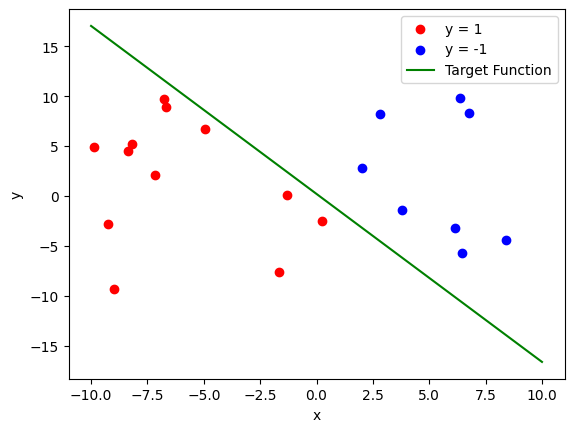

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(size=20, dim=2):
    """
    Generate a linearly separable data set of size 20 where dim=2 for binary classification.
    
    Parameters:
        size (int): Number of data points in the dataset.
        dim (int): Dimensionality of the feature space.
    
    Returns:
        X (numpy.ndarray): Input features matrix of shape (size, dim+1).
        y (numpy.ndarray): Target labels vector of shape (size,).
        w (numpy.ndarray): True weight vector used to generate the data of shape (dim+1,).
    """
    N = size  # Number of data points
    d = dim   # Dimensionality
    
    # Generate random feature vectors in the range [-10, 10]
    X = np.random.uniform(-10, 10, (N, d))  
    
    # Add a column of ones to account for bias term in linear model
    X = np.hstack((np.ones((N, 1)), X))  
    
    # Generate random weights for the linear model in the range [-1, 1]
    w = np.random.uniform(-1, 1, (d + 1))  
    
    # Compute target labels based on the sign of dot product between features and weights
    y = np.sign(X @ w)  
    
    return X, y, w

def plot_data(x, y):
    """
    Plots the synthetic dataset.
    
    Parameters:
        x (numpy.ndarray): Input features matrix of shape (size, dim+1).
        y (numpy.ndarray): Target labels vector of shape (size,).
    """
    plt.figure()
    
    # Scatter plot for points with y=1
    plt.scatter(x[y == 1][:, 1], x[y == 1][:, 2], color='red', label='y = 1')  
    
    # Scatter plot for points with y=-1
    plt.scatter(x[y == -1][:, 1], x[y == -1][:, 2], color='blue', label='y = -1')  
    
    plt.xlabel('x')  # Label x-axis
    plt.ylabel('y')  # Label y-axis
    plt.legend()  # Show legend

def plot_function(w, label='Target Function', color='green'):
    """
    Plots the target function.
    
    Parameters:
        w (numpy.ndarray): True weight vector used to generate the data of shape (dim+1,).
        color (str): Color of the plotted line.
    """
    x = np.linspace(-10, 10, 100)  # Generate x values for plotting
    
    # Plot the target function line
    plt.plot(x, -(w[0] + w[1] * x) / w[2], color=color, label=label)  
    
    plt.legend()  # Show legend
    
# Plot the linearly separable dataset and the target function
X, y, w = generate_dataset()
plot_data(X, y)
plot_function(w)
plt.show()

### Problem 1.4 (b)

Number of Updates Before Conversion:  9


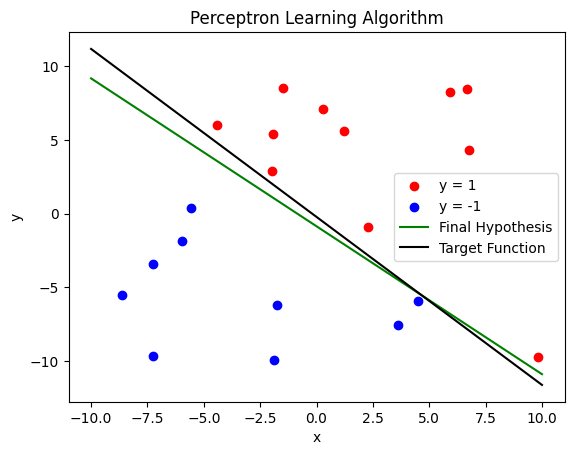

In [90]:
def run_perceptron_learning(x, y):
    '''
    Run the perceptron learning algorithm on the data set above. Report the number of
    updates that the algorithm takes before converging. Plot the examples, the target
    function f and the final hypothesis g in the same figure. Comment on whether f is close
    to g.
    '''
    N = x.shape[0]
    d = x.shape[1]
    w = np.zeros(d) # Initialize weights
    converged = False
    num_updates = 0
    while not converged:
        converged = True
        for i in range(N):
            if y[i] * (x[i] @ w) <= 0:
                w += y[i] * x[i]
                num_updates += 1
                converged = False
    return num_updates, w

def perceptron(size=20, dim=2, plot=True):
    x, y, w = generate_dataset(size, dim)

    num_updates, W = run_perceptron_learning(x, y)
    print("Number of Updates Before Conversion: ", num_updates)

    if plot:
        plot_data(x, y)
        plot_function(w, label='Final Hypothesis', color='green')
        plot_function(W, label='Target Function', color='black')
        plt.title('Perceptron Learning Algorithm')
        plt.show()
        
    return x, y
        
_ = perceptron()

In [ ]:
'''
Q: Comment on whether f is close to g.

A: g is very close to f since the data is linearly separable. The perceptron learning algorithm is guaranteed to converge (Scientifically proven) and the final hypothesis g will be close to the target function f.
'''

### Problem 1.4 (c)

Number of Updates Before Conversion:  9


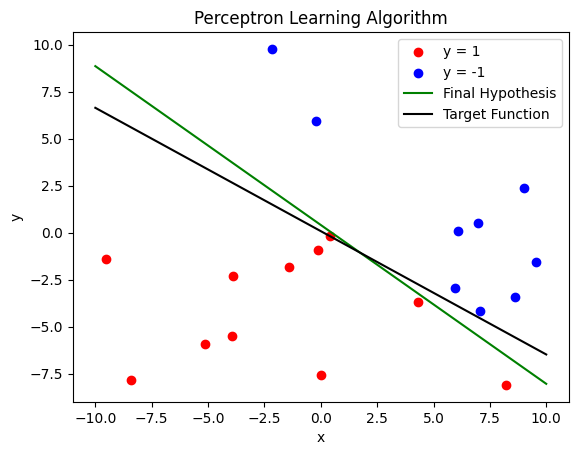

In [51]:
_ = perceptron(size=20, dim=2)
'''
Q: Repeat the experiment with another randomly generated dataset of size 20 and dimensionality 2. Compare the result with the previous experiment.

A: g is closer to f in (b) than in (c) because the data is more spread out in (b) than in (c). However, it is still close to f in both cases because the data is linearly separable. The comparison is completely random because both (b) and (c) generate data of the same size and dimensionality.
'''

### Problem 1.4 (d)

Number of Updates Before Conversion:  7


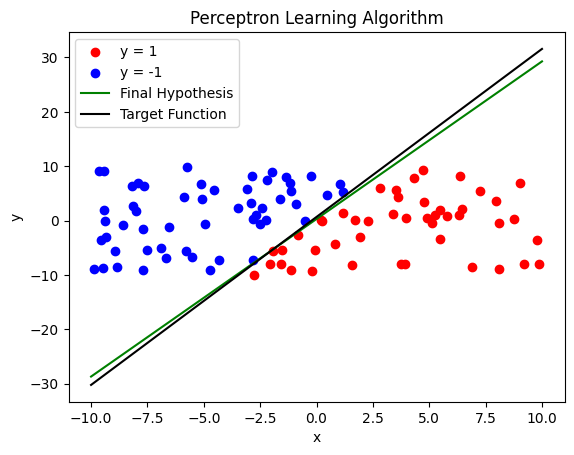

In [52]:
_ = perceptron(size=100, dim=2)
'''
When we compare hypotheses f and g, we see that g is closer to f, and this difference is more noticeable than in situation b.

Hoeffding's inequality tells us that when we have more data points, there's a higher chance that our hypothesis function will be close to the target function. This idea supports our findings. With more training points, the chance of our hypothesis function being close to the target function increases because the bound decreases. However, having more data points doesn't guarantee that the hypothesis function will be closer to the target function compared to situation b.

In simpler terms, adding more data points improves how accurately our hypothesis function can predict outcomes.
'''

### Problem 1.4 (e)

Number of Updates Before Conversion:  212


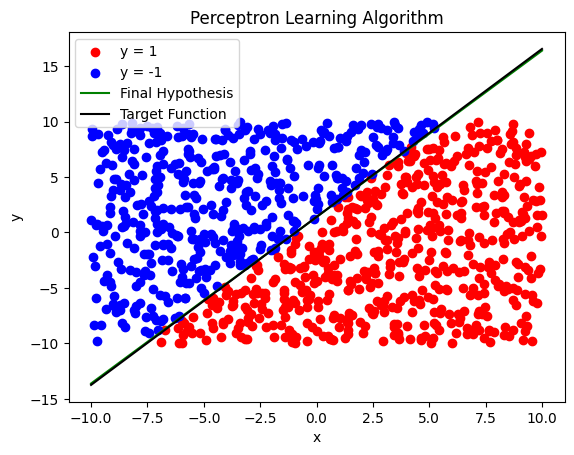

In [94]:
_ = perceptron(size=1000, dim=2)
'''
The number of training points is very high compared to b, so the bound decreases significantly and g becomes closer to f. This is consistent with the idea that the more data points we have, the more accurate our hypothesis function will be.
'''

### Problem 1.4 (f)

In [95]:
x, y = perceptron(size=1000, dim=10, plot=False)

Number of Updates Before Conversion:  4056


### Problem 1.4 (g)

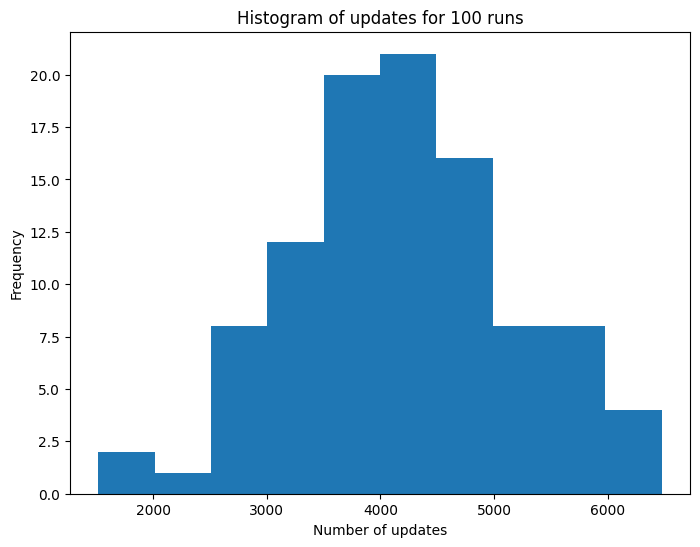

In [96]:
# List to store the number of updates required for each experiment
updates = []

# Number of experiments to run
num_experiments = 100

# Loop over each experiment
for i in range(num_experiments):
    # Create a list of tuples containing input features (x) and corresponding labels (y)
    data = list(zip(x, y))
    
    # Shuffle the data randomly to simulate random ordering of examples
    random.shuffle(data)
    
    # Run the perceptron learning algorithm on the shuffled data and get the number of updates required
    num_updates, _ = run_perceptron_learning(np.array([d[0] for d in data]), np.array([d[1] for d in data]))
    
    # Append the number of updates to the list
    updates.append(num_updates)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(updates, bins=10)  # Plot histogram with 10 bins
plt.xlabel('Number of updates')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.title(f'Histogram of updates for {num_experiments} runs')  # Set title
plt.show()  # Display the plot

### Problem 1.4 (h)

In [ ]:
'''
Q: Summarize your conclusions with respect to accuracy and running time as a function of N and d.

A: The number of dimensions and the number of training examples don't affect how many points are classified correctly. However, when it comes to making predictions that apply to new, unseen data (generalization), having more training examples makes our hypothesis function closer to the true function. This idea is supported by Hoeffding's inequality. Increasing the number of training examples makes the average of our sample data closer to the average of the entire population.

Adding more training examples also increases the complexity of the algorithm because it requires more updates to the model. Similarly, increasing the number of dimensions also increases the complexity because it requires more calculations to handle each data point.
'''